# Classification of machines

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

df = pd.read_csv('../data/raw/Classification/predictive_maintenance.csv')

In [2]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [36]:
def preprocess(df):
    df.dropna(subset=['Product ID', 'Type', 'Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type'], inplace=True)
    
    # one hot encoding du type de produit
    df = pd.get_dummies(df, columns=['Type'])
    return df

In [37]:
df=preprocess(df)
df

In [55]:
machines_H = df[df['Type_H'] == 1]
machines_L = df[df['Type_L'] == 1]
machines_M = df[df['Type_M'] == 1]

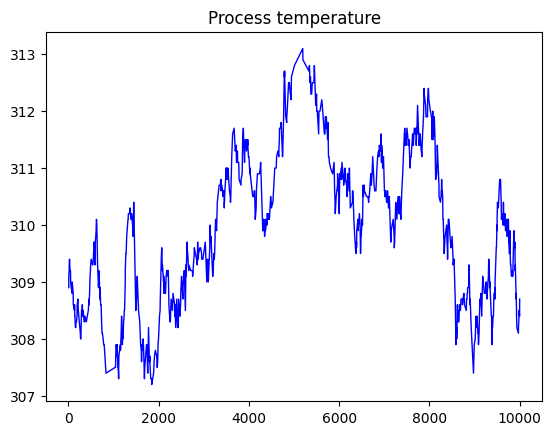

In [56]:
plt.plot(machines_H['Process temperature [K]'], label='Process temperature [K]', color='blue', animated = True, linewidth=1)
plt.title('Process temperature')
plt.show()

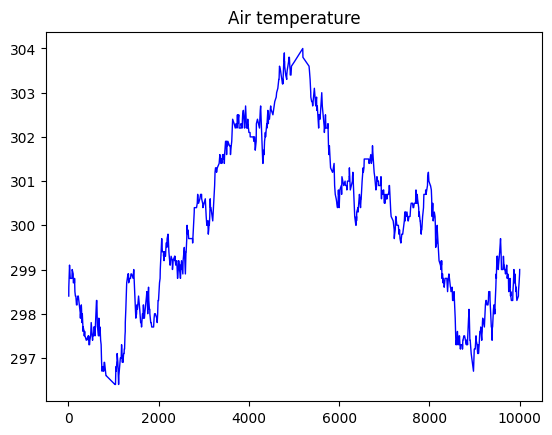

In [57]:
plt.plot(machines_H['Air temperature [K]'], label='Air temperature [K]', color='blue', animated = True, linewidth=1)
plt.title('Air temperature')
plt.show()

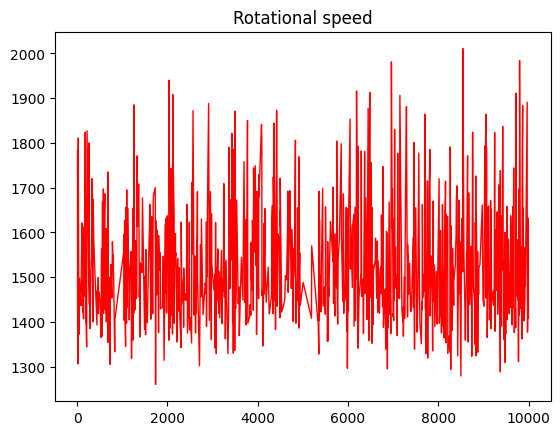

In [58]:
plt.plot(machines_H['Rotational speed [rpm]'], label='Rotational speed [rpm]', color='red', animated = True, linewidth=1)
plt.title('Rotational speed')
plt.show()

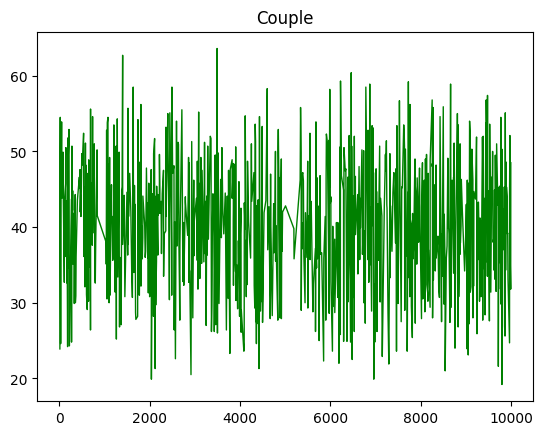

In [59]:
plt.plot(machines_H['Torque [Nm]'], label='Torque [Nm]', color='green', animated = True, linewidth=1)
plt.title('Couple')
plt.show()

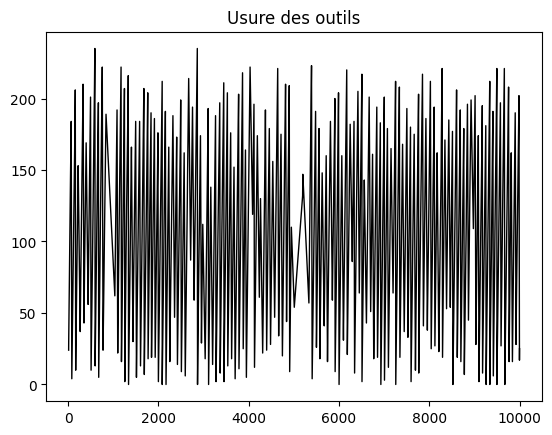

In [60]:
plt.plot(machines_H['Tool wear [min]'], label='Tool wear [min]', color='black', animated = True, linewidth=1)
plt.title('Usure des outils')
plt.show()

In [61]:
set(df['Failure Type'])
# remarque : en enlevant les aberrations, ça supprime toutes les machines qui ont une autre panne que panne aléatoire

{'No Failure', 'Random Failures'}

In [8]:
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['Failure Type']
